In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\USER\PycharmProjects\DSGP-Component 2\data\processed_clean.csv")
df.head()


,depart_time,duration,waiting_time,route_length,time_loss,travel_speed_kmh,congestion_ratio,efficiency_score_from_perf,delay_ratio,efficiency_category,depart_time_bin
0,5.0,69.0,0.0,637.42,15.78,33.256696,0.000000,9.237971,0.228696,medium,0
1,15.0,60.0,10.0,414.60,23.78,24.876000,0.166667,6.910000,0.396333,medium,1
2,0.0,94.0,5.0,789.03,25.83,30.218170,0.053191,8.393936,0.274787,medium,0
3,48.0,62.0,14.0,478.15,28.45,27.763548,0.225806,7.712097,0.458871,medium,3
4,98.0,12.0,0.0,84.57,3.51,25.371000,0.000000,7.047500,0.292500,medium,6


In [3]:
# Input features 
X = df[[
    "route_length",
    "duration",
    "travel_speed_kmh",
    "depart_time_bin",
    "congestion_ratio",   
    "delay_ratio"         
]]

# Target
y = df["waiting_time"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
results = {}

In [7]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
results["Linear Regression"] = r2_score(y_test, pred_lr)

In [8]:
# 2. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
results["Random Forest"] = r2_score(y_test, pred_rf)

In [9]:
# 3. Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
results["Gradient Boosting"] = r2_score(y_test, pred_gb)

In [10]:
# 4. KNN Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)
results["KNN"] = r2_score(y_test, pred_knn)

In [11]:
# 5. XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)
results["XGBoost"] = r2_score(y_test, pred_xgb)

In [12]:
print("Model B Results (R² Score):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")


Model B Results (R² Score):
Linear Regression: 0.9976
Random Forest: 0.9983
Gradient Boosting: 0.9987
KNN: 0.9959
XGBoost: 0.9938


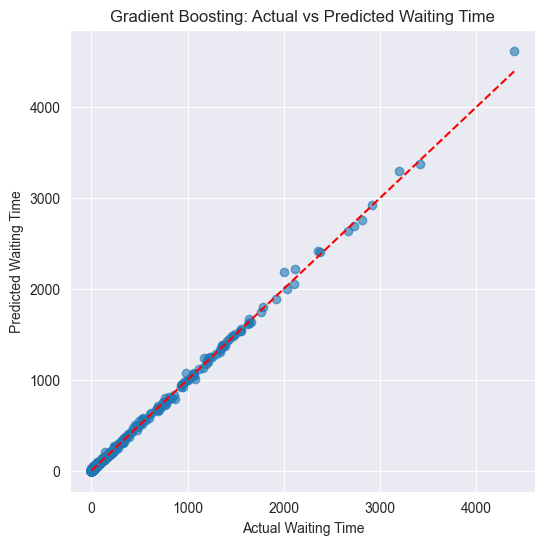

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Waiting Time")
plt.ylabel("Predicted Waiting Time")
plt.title("Gradient Boosting: Actual vs Predicted Waiting Time")
plt.show()
